## <font color='blue'>Predição de Salários em Função das Horas de Estudos Mensais por meio do Scikit Learn</font>

## <font color='blue'>Machine Learning com Scikit-Learn</font>

<h2><font color = 'blue'>Objetivo</font></h2>

<b>O projeto possui como objetivo o treinamento nas bibliotecas como pandas, numpy, matplotlib, seaborn e scikit learn. Os dados explorados são dados relativos ao tempo de estudos mensais e o respectivo salário do trabalhador. O problema de negócio proposto é uma forma de prever o salário utilizando os dados históricos de horas de estudos. Para produzir tal modelo capaz de prever essa relação, foi utilizada a biblioteca scikit learn para produzir uma função capaz de prever tão comportamento entre as duas e assim tentar prever o valor do salário para um valor determinado de horas estudadas. A ideia do projeto tem origem em uma aula do curso da Data Science Academy.</b>

<h2><font color = 'blue'>Ferramentas Utilizadas</font></h2>

<b><li>Python 3.10.13<li>Pandas<li>numpy<li>Matplotlib<li>Seaborn<li>Scikit Learn</b>

<h2><font color = 'blue'>Desenvolvimento</font></h2>

<b>Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?</b>

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.13


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [5]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

<b>Para a descrição geral do dataframe, ele apresentou 500 registros de dados, sendo que 2 colunas estavam presentes, a coluna de horas estudadas e o respectivo salário de cada uma dessas pessoas.</b>

In [4]:
df_dsa.shape

(500, 2)

In [5]:
df_dsa.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df_dsa.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


<b>Ambas as colunas eram do tipo float.</b>

In [7]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## Análise Exploratória - Resumo Estatístico

In [8]:
# Verificando se há valores ausentes
df_dsa.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

<b>Inicialmente, como o modelo utilizado para tentar prever os valores foi o de regressão linear, foi verificada se realmente havia uma correlação entre as variáveis horas de estudos mensais e salário. O valor obtido foi bem próximo de 1, ou seja, havia uma relação diretamente proporcional entre as variáveis. Dessa forma, quanto mais aumentavam as horas de estudos, mais o salário deveria aumentar.</b>

In [9]:
# Correlação
df_dsa.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<b>Pelo resumo estatístico mais geral, pôde-se perceber uma distribuição mais homogênea dos valores. Os valores mínimos e máximos, em relação à média, apresentaram o mesmo distancimento de aproximadamente 50 horas para o tempo de estudo e, para o salário, de 3000. Isso poderia significar bons indícios de uma distribuição mais simétrica. Além disso, os valores da média e da mediana foram aproximadamente o mesmo valor, o que pode também indicar uma boa tendência para uma distribuição que poderia ser representada por uma distribuição normal.</b>

In [10]:
# Resumo estatístico do dataset 
df_dsa.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Resumo estatístico da variável preditora
df_dsa["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<b>Verificando o comportamento da distribuição dos dados das horas de estudos, pôde-se verificar uma organização dos valores com uma proximidade a uma distribuição normal, como pôde ser visto pela reta.</b>

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

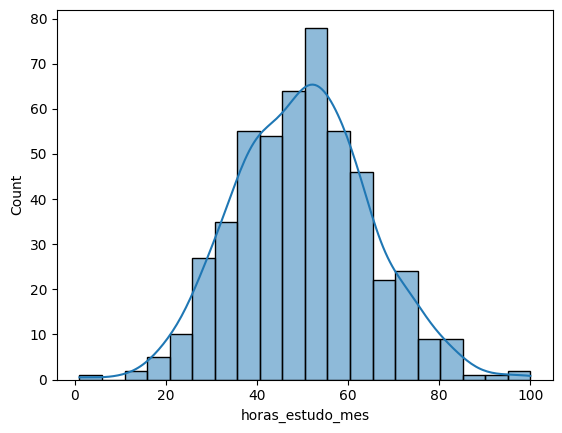

In [12]:
# Histograma da variável preditora
sns.histplot(data = df_dsa, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

<b>A variável preditora foi chamada de X e foi guardado nela os valores relativos a horas de estudo por mês.</b>

In [6]:
# Prepara a variável de entrada X
X = np.array(df_dsa['horas_estudo_mes'])

In [14]:
type(X)

numpy.ndarray

<b>O Scikit Learn necessita que o shape do array da variável preditora seja colocado com 1 coluna e o número de linhas relativo a quantidade de dados inseridos.</b>

In [7]:
# Ajusta o shape de X
X = X.reshape(-1, 1)

In [10]:
X.shape

(500, 1)

<b>A variável alvo foi guardada na variável y, ou seja, os valores encontrados na coluna salário.</b>

In [8]:
# Prepara a variável alvo
y = df_dsa['salario']

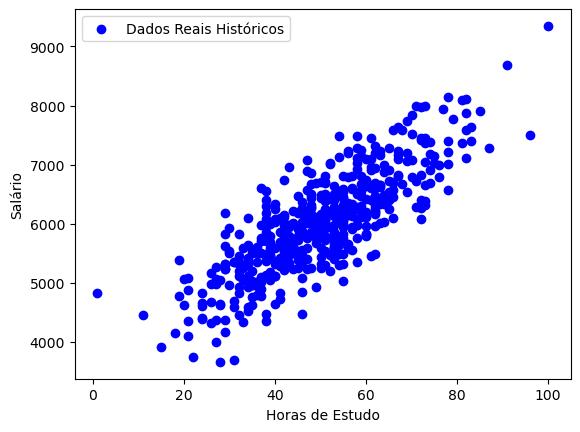

In [11]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

<b>Para definir o treino e o teste, foi realizada a linha de código abaixo. As variáveis X e y com "treino" e "teste" foram definidas para receber a divisão dos dados apresentados para treino e teste. Isso é essencial no processo de machine learning para que os dados sejam testados em uma amostra diferente da amostra utilizada para treino, pois, testar os dados com os dados utilizados para treino por significar um treinamento ruim do modelo. O parâmetro "test_size" serve para definir quantos dados a amostra de teste tem e o "random_state" serve para garantir que a divisão das amostras sejam possível de ser repetida em diferentes execuções do código. Isso é importante para que o modelo possa ser reproduzido em outros momentos e em outras máquinas, usando os mesmos dados.</b>

In [16]:
# Dividir dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

<b>Como a divisão foi de 20% para as amostras de teste, 80% dos dados, ou seja, 400 registros foram utilizados para a variável treino. Consequentemente, 100 registros foram utilizados para realizar o teste.</b>

In [19]:
X_treino.shape

(400, 1)

In [20]:
X_teste.shape

(100, 1)

In [21]:
y_treino.shape

(400,)

In [22]:
y_teste.shape

(100,)

## Modelagem Preditiva (Machine Learning)

<b>Com as variáveis de teste e treino definidas, foi realizado o treinamento do modelo. Como o modelo a ser realizado foi o de regressão linear, foi criado um objeto "modelo" da classe "LinearRegression()".</b>

In [17]:
# Cria o modelo de regressão linear simples
modelo = LinearRegression()

<b>Definindo o treinamento do modelo, introduzindo as respectivas variáveis definidas na sessão anterior.</b>

In [18]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

<b>Com o modelo treinado, foi plotada a predição realizada pelo modelo. Visualmente, o modelo pareceu se encaixar no comportamento dos dados utilizados.</b>

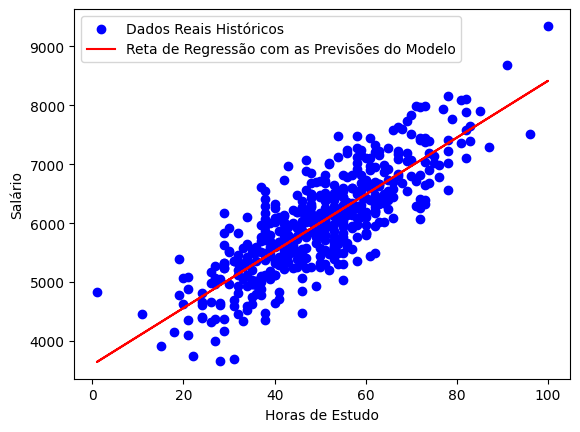

In [25]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, modelo.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

<b>Para verificar o quanto o modelo conseguiu predizer o comportamento dos dados, foi utilizado o método <code>score()</code> com as variáveis definidas como teste para verificar o coeficiente R². Esse coeficiente diz o quanto o modelo consegue explicar variações ocorridas na variável independente. Quanto mais próximo de 1, mais o modelo se encaixa.</b>

In [19]:
# Avalia o modelo nos dados de teste
score = modelo.score(X_teste, y_teste)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


<b>Intercept é o alongamento da reta até o cruzamento com o eixo y. Esse parâmetro diz que quando o valor de horas estudadas é igual a zero, a tendência é que o salário seja igual a 3596.</b>

In [20]:
# Intercepto - parâmetro w0
modelo.intercept_

3596.7837243727536

<b>O próximo parâmetro pode ser interpretado como a proporção que o salário cresce para cada hora de estudo adicionada. Segundo o modelo, salário tende a aumentar 48 unidades para cada hora estudo adicionada.</b>

In [21]:
# Slope - parâmetro w1
modelo.coef_

array([48.18185277])

## Deploy do Modelo

<b>Agora, utilizando o modelo para predizer o salário segundo algum valor de horas de estudo específico. Para isso, foi necessário definir o valor de horas em um array para ser utilizado no método <code>predict()</code>.</b>

In [22]:
# Define um novo valor para horas de estudo
horas_estudo_novo = np.array([[48]]) 

# Faz previsão com o modelo treinado
salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


<b>Outra forma de predizer o valor do salário é por meio da utilização matemática da equação da reta. Essa outra forma representa o que o método <code>predict()</code> realiza.</b>

In [23]:
# Mesmo resultado anterior usando os parâmetros (coeficientes) aprendidos pelo modelo
# y1 = w0 + w1 * X
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)
print(salario)

[[5909.5126574]]


<b>Utilizando o modelo para predizer outros valores de salários para outras horas específicas.</b>

In [31]:
horas_estudo_novo = np.array([[65]]) 

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [32]:
horas_estudo_novo = np.array([[73]]) 

salario_previsto = modelo.predict(horas_estudo_novo)

print(f"Se você estudar cerca de", horas_estudo_novo, "horas por mês seu salário pode ser igual a", salario_previsto)

Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]


<h2><font color = 'blue'>Conclusão</font></h2>

<b>O modelo de machine learning proposto conseguiu realizar uma correlação entre a variável preditora "horas de estudos" e a variável alvo "salário". Esse modelo apresentou um bom coeficiente R-quadrado, sendo o valor encontrado 0.59. Como o valor mais próximo de 1, significa que o modelo consegue predizer as variações existentes na variável independente, o valor de R-quadrado foi satisfatório. Além disso, visualizando a plotagem da reta que prediz o comportamento dos dados apresentados, também pôde ser visto que o modelo proposto apresenta uma tendência aproximada à variação que ocorre nos dados utilizados.</b>

<b>Por último, o modelo foi capaz de apresentar valores propostos para novos valores de salário para a respectiva quantidade de horas estudadas. É satisfatória a conclusão alcançada, pois, como o objetivo do projeto era apenas realizar a produção de um modelo de machine learning capaz de predizer o comportamento dos dados apresentados, o objetivo foi alcançado. No entanto, análises e testes estatísticos seriam necessários para confirmar a capacidade de predição do modelo.</b>

<b>Conclui-se que o Scikit Learn é uma poderosa ferramenta para a produção de modelos de machine learning capazes de predizer comportamentos e tendências em um grupo de dados, sendo essencial para que as tomadas de decisões sejam tomadas de forma consciente.</b>